In [42]:
import pandas as pd
import pdfplumber
import numpy as np
from utils import *

## Table detection


In [43]:
# pdf_restric

In [44]:
pdf_path = "mcs2024.pdf"

material = 'CADMIUM'

p = 57


pdf_restric = {material: [p, p+1]}

selected_p = p

scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

selected_content = 'content_1'

if selected_content == 'content_1':
    selected_p = p - 1
else:
    selected_p = p

selected_page = scraping_base[material][selected_content]
df = selected_page
page_text_df = selected_page


bounding_box = extract_cols(page_text_df, 'x1', 2)

In [45]:
# pdf_path = "mcs2024.pdf"

# material = 'Bismuth'

# p = 51


# pdf_restric = {material: [p, p+1]}

# selected_p = p

# scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

# selected_content = 'content_1'

# if selected_content == 'content_1':
#     selected_p = p - 1
# else:
#     selected_p = p

# selected_page = scraping_base[material][selected_content]
# df = selected_page
# page_text_df = selected_page


# bounding_box = extract_cols(page_text_df, 'x1', 2)

In [46]:
# pdf_path = "mcs2024.pdf"

# material = 'Arsenic'

# p = 41


# pdf_restric = {material: [p, p+1]}

# selected_p = p

# scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

# selected_content = 'content_1'

# if selected_content == 'content_1':
#     selected_p = p - 1
# else:
#     selected_p = p

# selected_page = scraping_base[material][selected_content]
# df = selected_page
# page_text_df = selected_page


# bounding_box = extract_cols(page_text_df, 'x1', 2)

In [47]:
# pdf_path = "mcs2024.pdf"

# material = 'Sand and Gravel'

# p = 159


# pdf_restric = {material: [p, p+1]}

# selected_p = p

# scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

# selected_content = 'content_1'

# if selected_content == 'content_1':
#     selected_p = p - 1
# else:
#     selected_p = p

# selected_page = scraping_base[material][selected_content]
# df = selected_page
# page_text_df = selected_page


# bounding_box = extract_cols(page_text_df, 'x1', 2)

In [48]:
# pdf_path = "mcs2024.pdf"

# material = 'ABRASIVES'

# p = 34


# pdf_restric = {material: [p, p+1]}

# selected_p = p

# scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

# selected_content = 'content_2'

# if selected_content == 'content_1':
#     selected_p = p - 1
# else:
#     selected_p = p

# selected_page = scraping_base[material][selected_content]
# df = selected_page
# page_text_df = selected_page


# bounding_box = extract_cols(page_text_df, 'x1', 2)

In [49]:
# pdf_path = "mcs2024.pdf"

# material = 'SILICON'

# p = 164


# pdf_restric = {material: [p, p+1]}

# selected_p = p

# scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

# selected_content = 'content_2'

# if selected_content == 'content_1':
#     selected_p = p - 1
# else:
#     selected_p = p

# selected_page = scraping_base[material][selected_content]
# df = selected_page
# page_text_df = selected_page


# bounding_box = extract_cols(page_text_df, 'x1', 2)

In [50]:
# pdf_path = "mcs2024.pdf"

# material = 'Fluorspar'

# p = 76


# pdf_restric = {material: [p, p+1]}

# selected_p = p

# scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

# selected_content = 'content_2'

# if selected_content == 'content_1':
#     selected_p = p - 1
# else:
#     selected_p = p

# selected_page = scraping_base[material][selected_content]
# df = selected_page
# page_text_df = selected_page


# bounding_box = extract_cols(page_text_df, 'x1', 2)

In [51]:
# pdf_path = "mcs2024.pdf"

# material = 'Selenium'

# p = 162


# pdf_restric = {material: [p, p+1]}

# selected_p = p

# scraping_base = extract_positions_for_elements(pdf_path, pdf_restric)

# selected_content = 'content_2'

# if selected_content == 'content_1':
#     selected_p = p - 1
# else:
#     selected_p = p

# selected_page = scraping_base[material][selected_content]
# df = selected_page
# page_text_df = selected_page


# bounding_box = extract_cols(page_text_df, 'x1', 2)

In [52]:
# Compute margin_top
# refering to previous word (in reading order)
df['margin_top'] = df['bottom'] - df['top'].shift(1)

# Fill the last value of margin_top with 0 or NaN as it has no preceding word
df['margin_top'] = df['margin_top'].fillna(0)

# set margin_top to 0 words in same line
df['margin_top'] = df.apply(lambda row: 0 if row['top'] == df['top'].shift(
    1).loc[row.name] else row['margin_top'], axis=1)

gap_y_df = df[df['margin_top'] > 27]
# Perspective : change threshold using statistic (example : quantile 75 of margin_top)

In [53]:
# bounding_box['max_top_class'] = bounding_box['max_top'].apply(convert_to_class).astype(int)

# # Count occurrences of each value in 'max_top_class'
# class_counts = bounding_box['max_top_class'].value_counts()

# # Filter the dataframe to remove rows where 'max_top_class' exists only once
# bounding_box = bounding_box[bounding_box['max_top_class'].isin(class_counts[class_counts > 1].index)]

In [54]:
# bounding_box['min_bottom_class'] = bounding_box['min_bottom'].apply(convert_to_class).astype(int)

# # Count occurrences of each value in 'max_top_class'
# class_counts = bounding_box['min_bottom_class'].value_counts()

# # Filter the dataframe to remove rows where 'max_top_class' exists only once
# bounding_box = bounding_box[bounding_box['min_bottom_class'].isin(class_counts[class_counts > 1].index)]

In [55]:
bounding_box

,x1,min_bottom,max_top
0,257.0,455.1765,258.64752
1,328.0,455.1765,258.64752


In [56]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming bounding_box is already defined as a DataFrame

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

combined_data = np.concatenate(
    (bounding_box[['min_bottom']], bounding_box[['max_top']]), axis=0)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the combined data
normalized_combined_data = scaler.fit_transform(combined_data)

# Split the combined data back into two columns
split_index = len(bounding_box)
normalized_min_bottom = normalized_combined_data[:split_index]
normalized_max_top = normalized_combined_data[split_index:]

# Assign the scaled values back to the DataFrame
bounding_box['min_bottom_normalized'] = np.round(normalized_min_bottom, 0)
bounding_box['max_top_normalized'] = np.round(normalized_max_top, 0)

In [57]:
bounding_box

,x1,min_bottom,max_top,min_bottom_normalized,max_top_normalized
0,257.0,455.1765,258.64752,1.0,0.0
1,328.0,455.1765,258.64752,1.0,0.0


In [58]:
# Group by 'min_bottom_normalized' and 'max_top_normalized'
grouped = bounding_box.groupby(['min_bottom_normalized'])

# Convert each group into a separate dataframe and store them in a list
list_of_dfs = [group.reset_index(drop=True) for _, group in grouped]

list_of_top_bottom_bbox = []
for _, group in grouped:
    if len(group) > 1:
        list_of_top_bottom_bbox.append({
            'bbox_top': float(group['max_top'].min()),
            'bbox_bottom': float(group['min_bottom'].max())
        })

In [59]:
list_of_top_bottom_bbox

[{'bbox_top': 258.64752, 'bbox_bottom': 455.17650000000003}]

In [60]:
list_of_bbox = []
list_of_table_df = []
for top_bottom_bbox in list_of_top_bottom_bbox:
    bbox_top, bbox_bottom = top_bottom_bbox['bbox_top'], top_bottom_bbox['bbox_bottom']

    # Find the nearest 'top' and 'bottom' values in the dataframe
    gap_y_df['top_diff'] = np.abs(gap_y_df['top'] - bbox_top)
    gap_y_df['bottom_diff'] = np.abs(gap_y_df['bottom'] - bbox_bottom)
    gap_y_df['total_diff'] = gap_y_df['top_diff'] + gap_y_df['bottom_diff']

    # Get the row with the minimum total difference
    nearest_row = gap_y_df.loc[gap_y_df['total_diff'].idxmin()]
    nearest_row['top']

    # Calculate the differences between bbox_top and the 'top' values in the dataframe
    gap_y_df['top_diff'] = np.abs(gap_y_df['top'] - bbox_top)

    # Find the row with the minimum 'top_diff' and maximum 'bottom_diff'
    nearest_top_row = gap_y_df.loc[gap_y_df['top_diff'].idxmin()]

    # Filter the dataframe to only include rows with the nearest 'top' and 'bottom' values
    nearest_top_df = gap_y_df[gap_y_df['top'] == nearest_top_row['top']]
    bbox_top_final, bbox_bottom_final = nearest_top_df['top'], bbox_bottom

    padding = 5

    bbox_top_final, bbox_bottom_final = float(
        nearest_top_df['top']), float(bbox_bottom)

    table_df = page_text_df[(page_text_df['top'] >= bbox_top_final - padding)
                            & (page_text_df['bottom'] <= bbox_bottom_final + padding)]

    bbox_start, bbox_end = float(
        table_df['x0'].min()), float(table_df['x1'].max())

    list_of_bbox.append({
        'bbox_top': bbox_top_final,
        'bbox_bottom': bbox_bottom_final,
        'bbox_start': bbox_start,
        'bbox_end': bbox_end
    })
    list_of_table_df.append(table_df)

C:\Users\DataScience\AppData\Local\Temp\ipykernel_40784\1143877381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_y_df['top_diff'] = np.abs(gap_y_df['top'] - bbox_top)
C:\Users\DataScience\AppData\Local\Temp\ipykernel_40784\1143877381.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_y_df['bottom_diff'] = np.abs(gap_y_df['bottom'] - bbox_bottom)
C:\Users\DataScience\AppData\Local\Temp\ipykernel_40784\1143877381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [61]:
list_of_table_df[0]

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,margin_top
242,Refinery,227.700000,267.768978,247.66752,42258.00108,257.68752,True,10.02000,40.068978,ltr,32.00724
243,productione,270.538506,326.402880,246.39648,42256.73004,257.68752,True,11.29104,55.864374,ltr,10.02000
244,Reserves9,439.320000,487.442880,246.27648,42256.61004,257.56752,True,11.29104,48.122880,ltr,11.17104
245,2022,234.780000,257.094540,258.64752,42268.98108,268.66752,True,10.02000,22.314540,ltr,22.39104
246,2023,305.700000,328.014540,258.64752,42268.98108,268.66752,True,10.02000,22.314540,ltr,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
322,World,54.120000,80.271198,445.15650,42455.49006,455.17650,True,10.02000,26.151198,ltr,21.00000
323,total,83.041728,101.947464,445.15650,42455.49006,455.17650,True,10.02000,18.905736,ltr,0.00000
324,(rounded),104.702964,148.125636,445.15650,42455.49006,455.17650,True,10.02000,43.422672,ltr,0.00000
325,"22,600",226.440000,257.095188,445.15650,42455.49006,455.17650,True,10.02000,30.655188,ltr,0.00000


In [62]:
list_of_bbox[0]

{'bbox_top': 247.66751999999997,
 'bbox_bottom': 455.17650000000003,
 'bbox_start': 44.94,
 'bbox_end': 538.837872}

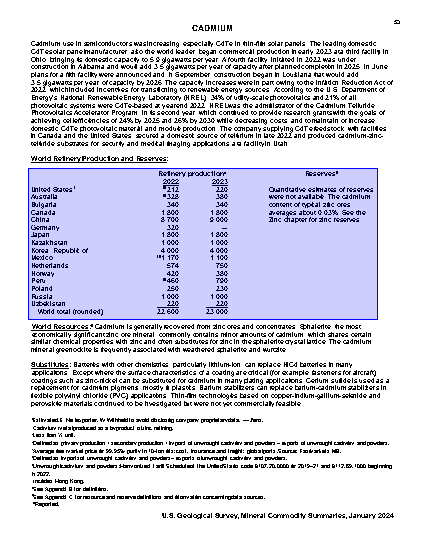

In [63]:
with pdfplumber.open("mcs2024.pdf") as pdf:
    im = pdf.pages[selected_p].to_image(resolution=50)

# Draw a rectangle using the bounding box coordinates
border_color = "blue"

for bbox in list_of_bbox:
    # Draw a rectangle using the bounding box coordinates with specified colors
    im.draw_rect([bbox['bbox_start'] - padding, bbox['bbox_top'] - padding, bbox['bbox_end'] + padding, bbox['bbox_bottom'] + padding],
                 stroke=border_color, stroke_width=1)

im

In [21]:
# STOP HERE

## Table to Dataframe


In [22]:
import re

# Remove special characters from 'text'
table_df['text'] = table_df['text'].apply(lambda x: re.sub(r'\W+', '', x))

C:\Users\DataScience\AppData\Local\Temp\ipykernel_45700\1481100593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_df['text'] = table_df['text'].apply(lambda x: re.sub(r'\W+', '', x))


In [23]:
# table_df

In [24]:
# filter indices (smaller than most used text height)

mode_height = table_df['height'].mode()[0]

table_df = table_df[table_df['height'] >= round(mode_height, 0)]

In [25]:
# table_df

In [26]:
mode_height

10.020000000000039

In [27]:
# for i in range(len(list_of_table_df)):
#     table_df = list_of_table_df[i]
#     mode_height = table_df['height'].mode()[0]
#     list_of_table_df[i] = table_df[table_df['height'] >= round(mode_height - 3, 0)]

In [28]:
list_table_and_bbox = list(zip(list_of_table_df, list_of_bbox))

In [29]:
list_of_table_df

[            text          x0          x1        top       doctop     bottom  \
 2    High-purity   45.365040   93.753624   60.13986  29398.47342   70.15986   
 3        arsenic   96.543192  128.734446   60.13986  29398.47342   70.15986   
 4          metal  131.525016  156.010890   60.13986  29398.47342   70.15986   
 5            was  158.766390  176.557902   60.13986  29398.47342   70.15986   
 6           used  179.347470  201.059808   60.13986  29398.47342   70.15986   
 ..           ...         ...         ...        ...          ...        ...   
 197           is  404.552693  411.787133  335.13250  29673.46606  345.15250   
 198   associated  414.635560  462.403120  335.13250  29673.46606  345.15250   
 199         with  465.162680  482.986120  335.13250  29673.46606  345.15250   
 200         gold  485.745680  504.713120  335.13250  29673.46606  345.15250   
 201  occurrences  507.472680  561.930098  335.13250  29673.46606  345.15250   
 
      upright  height      width direc

In [30]:
# list_of_table_df[0]

In [31]:
table_df[table_df['text'] == 'countries10']

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,margin_top


In [32]:
table_df[table_df['text'] == '957']

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,margin_top


In [33]:
list_of_bbox[0]

{'bbox_top': 60.13986000000011,
 'bbox_bottom': 345.1525000000001,
 'bbox_start': 44.94,
 'bbox_end': 565.7357039999998}

In [34]:
def spot_indice (list_table_and_bbox):

  indice_bbox_table = []
  for table_df, bbox in list_table_and_bbox:
    with pdfplumber.open(pdf_path) as pdf:
      
      page_ch = pdf.pages[selected_p]
      chars = page_ch.chars
      
      # Filter words that fall within the specified coordinates
      chars_in_area = [
          char for char in chars 
          if  bbox['bbox_top'] - 1.3 <= char['top'] and bbox['bbox_bottom'] >= char['bottom']
      ]

      # list_of_indices = chars_in_area

      list_of_indices = []
      for char in chars_in_area:
        if char['height'] < table_df['height'].mode()[0] - 0.1:
          # print(f"▶️ most repeated height: {table_df['height'].mode()[0]}, ▶️ char_height: {char['height']}, ▶️ char_text: {char['text']}")
          char_left = {key: char[key] for key in ['text', 'x0', 'x1', 'bottom', 'top', 'height', 'width']}
          list_of_indices.append(char_left)

      indice_bbox_table.append({
                'table_df': table_df,
                'bbox': bbox,
                'indices': list_of_indices
            })
  
  return indice_bbox_table

In [35]:
# check = spot_indice (list_table_and_bbox)[1]

In [36]:
# check[20]['text']

In [37]:
indice_bbox_table = spot_indice(list_table_and_bbox)

In [38]:
# indice_bbox_table

In [39]:
i = 0

len(indice_bbox_table[i]['indices'])

9

In [40]:
# ind = pd.DataFrame(indice_bbox_table[i]['indices'])

In [41]:
# ind[ind['text'] == '4'][['text', 'height']]

In [42]:
# ind[ind['height'] < 9.95][['text', 'height']]

In [43]:
def update_words_coordinates(indice_bbox_table):
    for entry in indice_bbox_table:
        words_df = entry['table_df']
        bbox = entry['bbox']
        chars_in_area = entry['indices']
        
        # Iterate over each character in the chars_in_area
        for char in chars_in_area:
            char_x0, char_top, char_x1, char_bottom, char_height = char['x0'], char['top'], char['x1'], char['bottom'], char['height']

            # Find the word that contains this character
            for idx, word_row in words_df.iterrows():
                word_x0, word_top, word_x1, word_bottom, word_height = word_row['x0'], word_row['top'], word_row['x1'], word_row['bottom'], word_row['height']
                
                if (word_x0 <= char_x0 <= word_x1 and word_top <= char_top <= word_bottom):
                    
                    # if char_height < word_height:
                    #     print(f'▶️ word height: {word_height}, ▶️ char_height: {char_height}')
                        word_text = word_row['text']
                        char_text = char['text']
                        
                        # Check if the character is on the left or right boundary of the word
                        if char_x0 <= word_x0:  # Character is to the left
                            # Remove the first occurrence of the character
                            word_text = word_text.replace(char_text, '', 1)
                            # Update the word text and coordinates
                            words_df.at[idx, 'text'] = word_text
                            words_df.at[idx, 'x0'] = char_x1
                        elif char_x1 >= word_x1:  # Character is to the right
                            # Remove the last occurrence of the character
                            word_text = word_text[::-1].replace(char_text[::-1], '', 1)[::-1]
                            # Update the word text and coordinates
                            words_df.at[idx, 'text'] = word_text
                            words_df.at[idx, 'x1'] = char_x0
                        
                        # Update the width of the word
                        words_df.at[idx, 'width'] = words_df.at[idx, 'x1'] - words_df.at[idx, 'x0']
                        
                        break  # Break after finding and processing the matching word
    
    return indice_bbox_table

In [44]:
indice_bbox_df = update_words_coordinates(indice_bbox_table)

KeyboardInterrupt: 

In [ ]:
df_test = indice_bbox_df[0]['table_df']

In [ ]:
df_test.head(6)

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,margin_top
11,Domestic,45.356280,90.407202,82.55136,28628.88492,92.57136,True,10.02,45.050922,ltr,32.49486
12,Production,93.176730,146.044254,82.55136,28628.88492,92.57136,True,10.02,52.867524,ltr,0.00000
13,and,148.744644,166.506096,82.55136,28628.88492,92.57136,True,10.02,17.761452,ltr,0.00000
14,Use:,169.266606,190.956900,82.55136,28628.88492,92.57136,True,10.02,21.690294,ltr,0.00000
15,Arsenic,193.732440,227.062968,82.04034,28628.37390,92.06034,True,10.02,33.330528,ltr,9.50898
16,trioxide,229.852536,262.126956,82.04034,28628.37390,92.06034,True,10.02,32.274420,ltr,0.00000


In [ ]:
# df_test[df_test['text'] == 'countries']

In [ ]:
# df_test[df_test['text'] == '57']

In [ ]:
# # Filter rows where 'height' is greater than mode_height to delete indice from string
# filtered_df = table_df[table_df['height'] > mode_height]

# # Function to remove the last string from a given string
# def remove_last_string(s):  # remove non digit char🔴
#     s = s.strip()
#     return s[:-1]

# # Apply the function to the 'row' column of the filtered DataFrame
# filtered_df['text'] = filtered_df['text'].apply(remove_last_string)

# # Update the original DataFrame with the modified values
# table_df.loc[table_df['height'] > mode_height, 'text'] = filtered_df['text']

In [ ]:
# table_df

In [ ]:
indice_bbox_table[0]['table_df']

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,margin_top
11,Domestic,45.356280,90.407202,82.55136,28628.88492,92.57136,True,10.02,45.050922,ltr,32.49486
12,Production,93.176730,146.044254,82.55136,28628.88492,92.57136,True,10.02,52.867524,ltr,0.00000
13,and,148.744644,166.506096,82.55136,28628.88492,92.57136,True,10.02,17.761452,ltr,0.00000
14,Use:,169.266606,190.956900,82.55136,28628.88492,92.57136,True,10.02,21.690294,ltr,0.00000
15,Arsenic,193.732440,227.062968,82.04034,28628.37390,92.06034,True,10.02,33.330528,ltr,9.50898
...,...,...,...,...,...,...,...,...,...,...,...
363,100,366.420000,383.153400,379.03650,28925.37006,389.05650,True,10.02,16.733400,ltr,0.00000
364,100,408.120000,424.853400,379.03650,28925.37006,389.05650,True,10.02,16.733400,ltr,0.00000
365,100,449.820000,466.553400,379.03650,28925.37006,389.05650,True,10.02,16.733400,ltr,0.00000
366,100,491.520000,508.253400,379.03650,28925.37006,389.05650,True,10.02,16.733400,ltr,0.00000


In [ ]:
comb_table_df = complexe_word(indice_bbox_table[1]['table_df'], 0)   # until here it's good

In [ ]:
comb_table_df

,text,x0,x1,top,doctop,bottom,upright,height,width,direction,margin_top
0,Data in metric tons arsenic content,161.0,324.0,58.98600,28605.31956,70.09650,True,11.1105,163.0,ltr,32.76450
1,unless otherwise specified,331.0,451.0,60.07650,28606.41006,70.09650,True,10.0200,120.0,ltr,11.11050
2,Domestic Production and Use,45.0,191.0,82.55136,28628.88492,92.57136,True,10.0200,146.0,ltr,32.49486
3,Arsenic trioxide and primary arsenic metal hav...,194.0,518.0,82.04034,28628.37390,92.06034,True,10.0200,324.0,ltr,9.50898
4,United States since 1985 The principal use for...,45.0,535.0,93.07650,28639.41006,103.09650,True,10.0200,490.0,ltr,21.05616
...,...,...,...,...,...,...,...,...,...,...,...
107,and Morocco continued to supply about 91 of Un...,45.0,538.0,665.05842,29211.39198,675.07842,True,10.0200,493.0,ltr,21.00192
108,leading world producer of arsenic metal and su...,45.0,498.0,676.04034,29222.37390,686.06034,True,10.0200,453.0,ltr,21.00192
109,September 2023 Malaysia supplied all of the ar...,45.0,487.0,687.08238,29233.41594,697.10238,True,10.0200,442.0,ltr,21.06204
110,Prepared by,45.0,100.0,739.93650,29286.27006,749.95650,True,10.0200,55.0,ltr,62.87412


In [ ]:
# comb_table_df = complexe_word(list_of_table_df[0], 0)   # until here it's good

In [ ]:
groups = []

# Iterate through each combination of rows to form groups
for i, row1 in comb_table_df.iterrows():
    added_to_any_group = False
    for group in groups:
        if any(belongs_to_same_group(row1, comb_table_df.iloc[j]) for j in group):
            group.append(i)
            added_to_any_group = True
    if not added_to_any_group:
        groups.append([i])

# Add group labels to the dataframe
comb_table_df['group'] = -1
group_label = 0
for group in groups:
    for index in group:
        if comb_table_df.at[index, 'group'] == -1:  # Assign a new group label if not already assigned
            comb_table_df.at[index, 'group'] = group_label
    group_label += 1

In [ ]:
comb_table_df['group'].unique().tolist()

[0, 1]

In [ ]:
comb_table_df[comb_table_df['group'] == 0]['bottom'].is_unique

False

In [ ]:
# unique_groups = comb_table_df['group'].unique()

# dfs = []

# # Loop over the unique values and create a DataFrame for each group
# for group in unique_groups:
#     df_group = comb_table_df[comb_table_df['group'] == group]
#     dfs.append(df_group)
#     # print("COUNT : ",len(df_group[['text', 'bottom', 'x0', 'x1']]))
#     # print(df_group[['text', 'bottom', 'x0', 'x1']])
#     # print()


In [ ]:
dff = comb_table_df[comb_table_df['group'] == 0]

# Sort the data by 'bottom'
data_sorted = dff.sort_values(by='bottom')

 # Group the data by 'bottom' and create new columns for each text in the same line
grouped = data_sorted.groupby('bottom')['text'].apply(lambda x: x.reset_index(drop=True)).unstack().reset_index()
# Calculate the minimum x0 value for each group (line)
min_x0 = data_sorted.groupby('bottom')['x0'].min().reset_index(name='min_x0')

# Merge the min_x0 values back into the grouped dataframe
grouped_with_min_x0 = pd.merge(grouped, min_x0, on='bottom')
# Fill NaN values with the first non-NaN value of each row
filled_grouped = grouped_with_min_x0.apply(lambda row: row.ffill(axis=0).bfill(axis=0), axis=1)

# Replace 'NaN' strings with the first value in each row
for col in filled_grouped.columns[1:-1]:  # Exclude 'bottom' and 'min_x0' columns
    filled_grouped[col] = filled_grouped[col].replace('NaN', method='ffill').replace('NaN', method='bfill')
    
filled_grouped

C:\Users\DataScience\AppData\Local\Temp\ipykernel_37164\2265317731.py:18: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  filled_grouped[col] = filled_grouped[col].replace('NaN', method='ffill').replace('NaN', method='bfill')


,bottom,0,1,2,3,4,5,min_x0
0,70.09650,Data in metric tons arsenic content,Data in metric tons arsenic content,Data in metric tons arsenic content,Data in metric tons arsenic content,Data in metric tons arsenic content,Data in metric tons arsenic content,161.0
1,92.06034,Arsenic trioxide and primary arsenic metal hav...,Arsenic trioxide and primary arsenic metal hav...,Arsenic trioxide and primary arsenic metal hav...,Arsenic trioxide and primary arsenic metal hav...,Arsenic trioxide and primary arsenic metal hav...,Arsenic trioxide and primary arsenic metal hav...,194.0
2,92.57136,Domestic Production and Use,Domestic Production and Use,Domestic Production and Use,Domestic Production and Use,Domestic Production and Use,Domestic Production and Use,45.0
3,103.09650,United States since 1985 The principal use for...,United States since 1985 The principal use for...,United States since 1985 The principal use for...,United States since 1985 The principal use for...,United States since 1985 The principal use for...,United States since 1985 The principal use for...,45.0
4,114.07842,trioxide was predominantly used for the produc...,trioxide was predominantly used for the produc...,trioxide was predominantly used for the produc...,trioxide was predominantly used for the produc...,trioxide was predominantly used for the produc...,trioxide was predominantly used for the produc...,45.0
5,125.06034,chromated copper arsenate CCA preservatives CC...,chromated copper arsenate CCA preservatives CC...,chromated copper arsenate CCA preservatives CC...,chromated copper arsenate CCA preservatives CC...,chromated copper arsenate CCA preservatives CC...,chromated copper arsenate CCA preservatives CC...,45.0
6,136.10238,primarily nonresidential applications such as ...,primarily nonresidential applications such as ...,primarily nonresidential applications such as ...,primarily nonresidential applications such as ...,primarily nonresidential applications such as ...,primarily nonresidential applications such as ...,45.0
7,147.08430,produced CCAtreated wood in the United States ...,produced CCAtreated wood in the United States ...,produced CCAtreated wood in the United States ...,produced CCAtreated wood in the United States ...,produced CCAtreated wood in the United States ...,produced CCAtreated wood in the United States ...,45.0
8,158.06622,galliumarsenide GaAs semiconductors for solar ...,galliumarsenide GaAs semiconductors for solar ...,galliumarsenide GaAs semiconductors for solar ...,galliumarsenide GaAs semiconductors for solar ...,galliumarsenide GaAs semiconductors for solar ...,galliumarsenide GaAs semiconductors for solar ...,45.0
9,169.10826,also was used for germaniumarsenideselenide sp...,also was used for germaniumarsenideselenide sp...,also was used for germaniumarsenideselenide sp...,also was used for germaniumarsenideselenide sp...,also was used for germaniumarsenideselenide sp...,also was used for germaniumarsenideselenide sp...,45.0


In [ ]:
grps = comb_table_df['group'].unique().tolist()

df_min_x0_tuples = []
for i, grp in enumerate(grps):
    df_grp = comb_table_df[comb_table_df['group'] == grp]
    if not df_grp['bottom'].is_unique:
        data_sorted = df_grp.sort_values(by='bottom')

        # Group the data by 'bottom' and create new columns for each text in the same line
        grouped = data_sorted.groupby('bottom')['text'].apply(lambda x: x.reset_index(drop=True)).unstack().reset_index()
        # Calculate the minimum x0 value for each group (line)
        min_x0 = data_sorted.groupby('bottom')['x0'].min().reset_index(name='min_x0')

        # Merge the min_x0 values back into the grouped dataframe
        grouped_with_min_x0 = pd.merge(grouped, min_x0, on='bottom')
        # Fill NaN values with the first non-NaN value of each row
        filled_grouped = grouped_with_min_x0.apply(lambda row: row.ffill(axis=0).bfill(axis=0), axis=1)

        # Replace 'NaN' strings with the first value in each row
        for col in filled_grouped.columns[1:-1]:  # Exclude 'bottom' and 'min_x0' columns
            filled_grouped[col] = filled_grouped[col].replace('NaN', method='ffill').replace('NaN', method='bfill')

        min_x0 = filled_grouped['min_x0'].min()
        result_df = filled_grouped.sort_values(by='bottom')
        result_df = result_df.drop(columns=['min_x0'])
        for col in result_df.columns.tolist():
            if col != 'bottom':
                result_df_col = result_df[['bottom', col]].rename(columns={col: 'text'})
                df_min_x0_tuples.append((result_df_col, min_x0))
        
    else:
        min_x0 = df_grp['x0'].min()
        result_df = df_grp.sort_values(by='bottom')[['text','bottom']]
        df_min_x0_tuples.append((result_df, min_x0))

C:\Users\DataScience\AppData\Local\Temp\ipykernel_37164\2457376295.py:21: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  filled_grouped[col] = filled_grouped[col].replace('NaN', method='ffill').replace('NaN', method='bfill')


In [ ]:
# grps = comb_table_df['group'].unique().tolist()
# for grp in grps:
#     df_grp = comb_table_df[comb_table_df['group'] == grp]
#     if not df_grp['bottom'].is_unique:
#         for _, df_sub in df_grp.groupby('x1'):
#             print(df_sub[['text', 'bottom', 'x1']])
#             print()

In [ ]:
# Sort the list of tuples by min_x0
df_min_x0_tuples_sorted = sorted(df_min_x0_tuples, key=lambda x: x[1])

# Extract the sorted DataFrames into a list
dfs = [df_tuple[0] for df_tuple in df_min_x0_tuples_sorted]

In [ ]:
for dfff in dfs:
    print(dfff)
    print()

       bottom                                               text
0    70.09650                Data in metric tons arsenic content
1    92.06034  Arsenic trioxide and primary arsenic metal hav...
2    92.57136                        Domestic Production and Use
3   103.09650  United States since 1985 The principal use for...
4   114.07842  trioxide was predominantly used for the produc...
5   125.06034  chromated copper arsenate CCA preservatives CC...
6   136.10238  primarily nonresidential applications such as ...
7   147.08430  produced CCAtreated wood in the United States ...
8   158.06622  galliumarsenide GaAs semiconductors for solar ...
9   169.10826  also was used for germaniumarsenideselenide sp...
10  180.09018  used for shortwave infrared technology The gri...
11  191.07210  arsenic metal Arsenic metal also was used as a...
12  202.11414  wheel weights The value of arsenic compounds a...
13  213.09606  8 million Given that arsenic metal has not bee...
14  224.07798  portion of

In [ ]:
merged_df = merge_list_of_dataframes(dfs).sort_values('bottom')
merged_df.drop('bottom', axis=1)

,text,text_1,text_2,text_3,text_4,text_5,text_6
0,Data in metric tons arsenic content,Data in metric tons arsenic content,Data in metric tons arsenic content,Data in metric tons arsenic content,Data in metric tons arsenic content,Data in metric tons arsenic content,unless otherwise specified
1,Arsenic trioxide and primary arsenic metal hav...,Arsenic trioxide and primary arsenic metal hav...,Arsenic trioxide and primary arsenic metal hav...,Arsenic trioxide and primary arsenic metal hav...,Arsenic trioxide and primary arsenic metal hav...,Arsenic trioxide and primary arsenic metal hav...,None
2,Domestic Production and Use,Domestic Production and Use,Domestic Production and Use,Domestic Production and Use,Domestic Production and Use,Domestic Production and Use,None
3,United States since 1985 The principal use for...,United States since 1985 The principal use for...,United States since 1985 The principal use for...,United States since 1985 The principal use for...,United States since 1985 The principal use for...,United States since 1985 The principal use for...,None
4,trioxide was predominantly used for the produc...,trioxide was predominantly used for the produc...,trioxide was predominantly used for the produc...,trioxide was predominantly used for the produc...,trioxide was predominantly used for the produc...,trioxide was predominantly used for the produc...,None
5,chromated copper arsenate CCA preservatives CC...,chromated copper arsenate CCA preservatives CC...,chromated copper arsenate CCA preservatives CC...,chromated copper arsenate CCA preservatives CC...,chromated copper arsenate CCA preservatives CC...,chromated copper arsenate CCA preservatives CC...,None
6,primarily nonresidential applications such as ...,primarily nonresidential applications such as ...,primarily nonresidential applications such as ...,primarily nonresidential applications such as ...,primarily nonresidential applications such as ...,primarily nonresidential applications such as ...,None
7,produced CCAtreated wood in the United States ...,produced CCAtreated wood in the United States ...,produced CCAtreated wood in the United States ...,produced CCAtreated wood in the United States ...,produced CCAtreated wood in the United States ...,produced CCAtreated wood in the United States ...,None
8,galliumarsenide GaAs semiconductors for solar ...,galliumarsenide GaAs semiconductors for solar ...,galliumarsenide GaAs semiconductors for solar ...,galliumarsenide GaAs semiconductors for solar ...,galliumarsenide GaAs semiconductors for solar ...,galliumarsenide GaAs semiconductors for solar ...,None
9,also was used for germaniumarsenideselenide sp...,also was used for germaniumarsenideselenide sp...,also was used for germaniumarsenideselenide sp...,also was used for germaniumarsenideselenide sp...,also was used for germaniumarsenideselenide sp...,also was used for germaniumarsenideselenide sp...,None
